In [67]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [68]:
import numpy as np
import pandas as pd
import sklearn   # scikit-learn library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import pickle
from joblib import dump, load

In [69]:
df = pd.read_csv('/Users/akbarjonrasulov/Downloads/aviachipta-narxini-bashorat-qilish/train_data.csv')
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [71]:
df = df.drop(columns=['id', 'flight'])

In [72]:
encoder = OrdinalEncoder()

cols_to_encode = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']

df[cols_to_encode] = encoder.fit_transform(df[cols_to_encode])

In [73]:
encoder = OrdinalEncoder(categories=[['Economy', 'Business']])
df['class'] = encoder.fit_transform(df[['class']])

In [74]:
df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,5.0,0.0,1.0,1,5.0,5.0,0.0,14.25,21,7212
1,4.0,3.0,2.0,0,5.0,4.0,0.0,1.75,7,5292
2,5.0,0.0,4.0,1,2.0,2.0,1.0,9.58,5,60553
3,5.0,4.0,4.0,1,2.0,3.0,0.0,6.75,28,5760
4,3.0,1.0,1.0,0,4.0,5.0,0.0,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...
19995,3.0,0.0,5.0,1,1.0,5.0,0.0,7.92,45,3153
19996,0.0,4.0,4.0,1,0.0,2.0,0.0,5.83,24,3911
19997,5.0,1.0,1.0,2,2.0,0.0,0.0,35.33,17,14822
19998,5.0,5.0,2.0,1,4.0,0.0,0.0,16.33,21,6450


In [75]:
df.corrwith(df['price']).sort_values(ascending=False)

price               1.000000
class               0.937868
airline             0.241193
duration            0.213158
stops               0.121455
departure_time      0.058520
arrival_time        0.046801
source_city         0.013570
destination_city    0.008747
days_left          -0.102545
dtype: float64

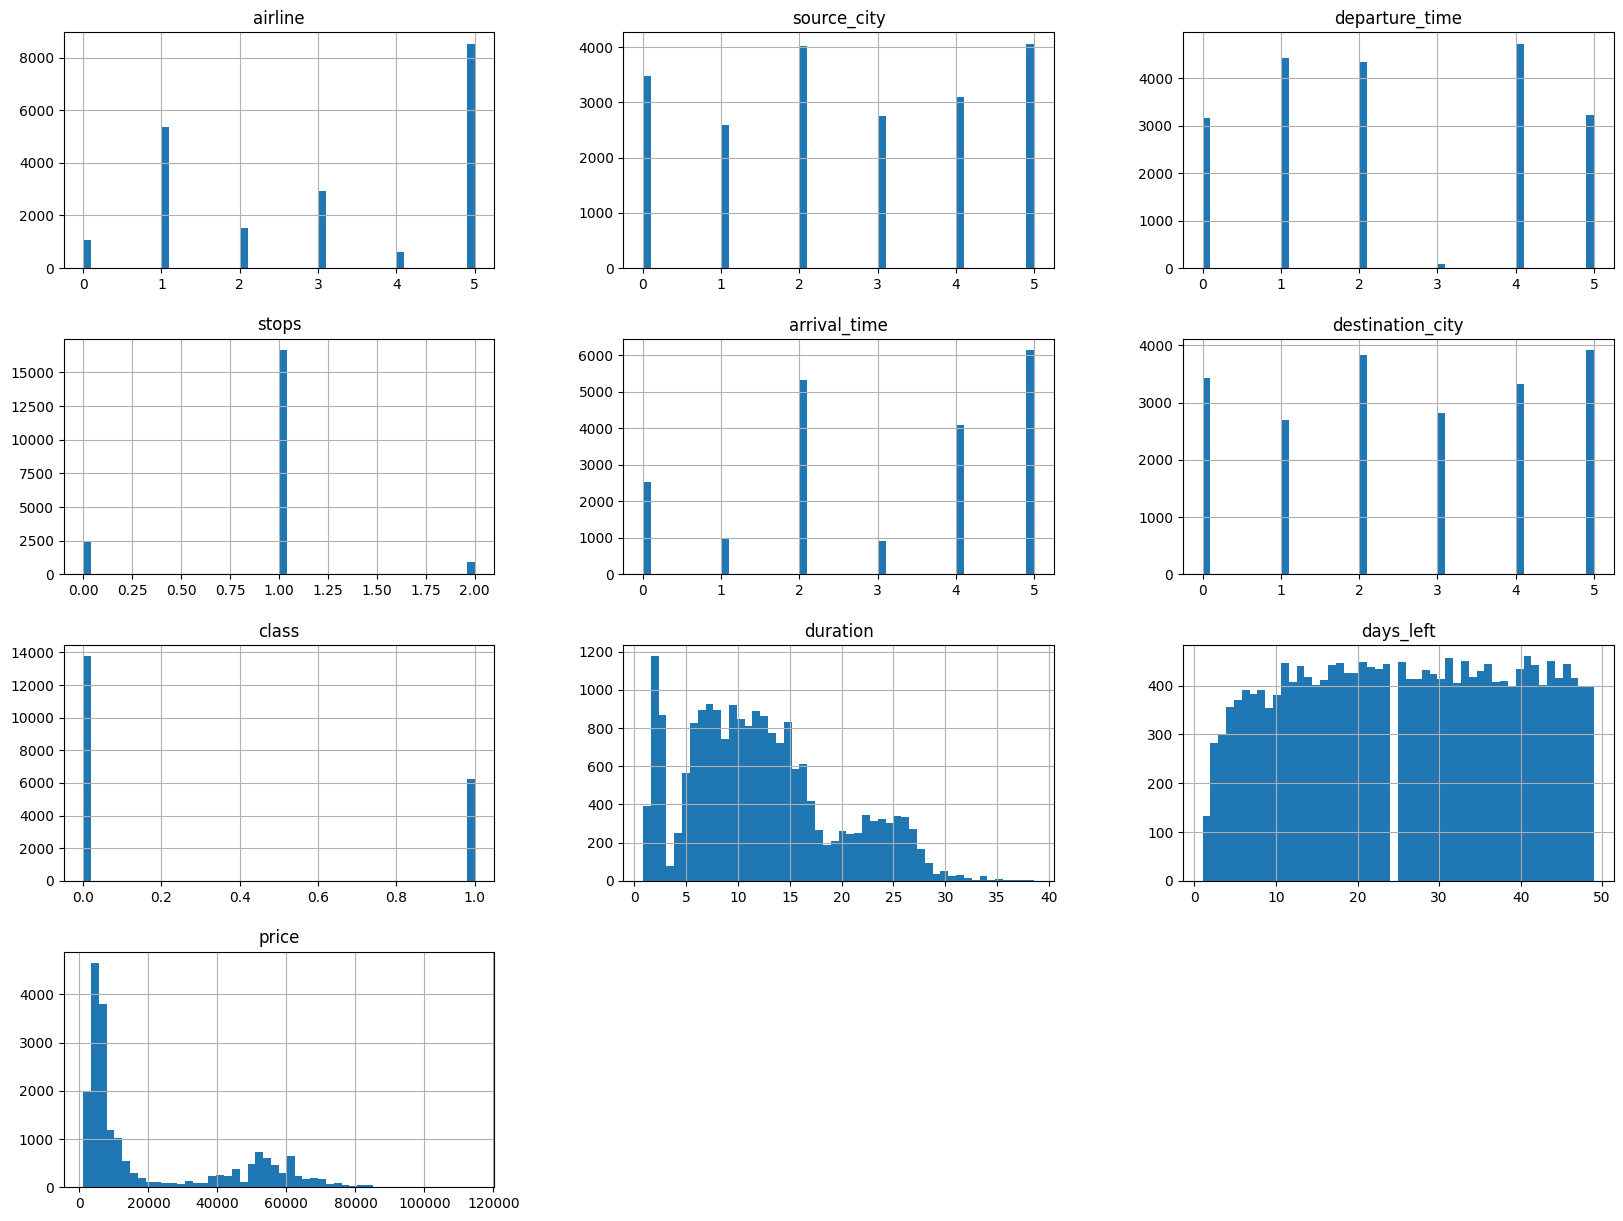

In [76]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [77]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [79]:
rf = RandomForestRegressor(n_estimators=20000, random_state=42)

rf.fit(X_train_scaled, y_train)

score = rf.score(X_test_scaled, y_test)

In [80]:
filename = 'RF_model.pkl' 
with open(filename, 'wb') as file:
    pickle.dump(rf, file)

In [81]:
y_pred = rf.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE of the random forest regressor model: {rmse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE of the random forest regressor model: {mae:.2f}')

RMSE of the random forest regressor model: 3907.96
MAE of the random forest regressor model: 2051.72


In [82]:
df2 = pd.read_csv('/Users/akbarjonrasulov/Downloads/aviachipta-narxini-bashorat-qilish/test_data.csv')
df2

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Air_India,AI-768,Kolkata,Afternoon,one,Morning,Bangalore,Business,17.42,15
4996,4997,Indigo,6E-6214,Kolkata,Morning,zero,Afternoon,Mumbai,Economy,3.00,40
4997,4998,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Business,11.17,37
4998,4999,Air_India,AI-673,Mumbai,Early_Morning,one,Night,Hyderabad,Business,13.33,38


In [83]:
df2['stops'] = df2['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
df2

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,1,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,1,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,0,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,1,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,1,Afternoon,Mumbai,Economy,16.33,35
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Air_India,AI-768,Kolkata,Afternoon,1,Morning,Bangalore,Business,17.42,15
4996,4997,Indigo,6E-6214,Kolkata,Morning,0,Afternoon,Mumbai,Economy,3.00,40
4997,4998,Air_India,AI-402,Kolkata,Morning,1,Night,Mumbai,Business,11.17,37
4998,4999,Air_India,AI-673,Mumbai,Early_Morning,1,Night,Hyderabad,Business,13.33,38


In [84]:
df2 = df2.drop(columns=['id', 'flight'])

In [85]:
encoder = OrdinalEncoder()

cols_to_encode = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']

df2[cols_to_encode] = encoder.fit_transform(df2[cols_to_encode])

In [86]:
encoder = OrdinalEncoder(categories=[['Economy', 'Business']])
df2['class'] = encoder.fit_transform(df2[['class']])

In [87]:
scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(df2)

In [88]:
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [89]:
y_pred_loaded = rf.predict(X_test_scaled)

In [90]:
result_df = pd.DataFrame({'id': df2.index+1, 'price': y_pred_loaded})
print(result_df)

        id        price
0        1  53235.39500
1        2  56888.96820
2        3  22864.73890
3        4   2596.07540
4        5   5704.61470
...    ...          ...
4995  4996  59616.58380
4996  4997   4564.92070
4997  4998  49553.82335
4998  4999  47495.73600
4999  5000  60999.00960

[5000 rows x 2 columns]


In [91]:
result_df.to_csv('predicted_prices.csv', index=False)

In [92]:
import os

cwd = os.getcwd()

file_path = os.path.join(cwd, 'predicted_prices.csv')
print(file_path)

/Users/akbarjonrasulov/predicted_prices.csv
